In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sweetviz as sweet_viz
import seaborn as sns
from imblearn.datasets import make_imbalance

In [40]:
# reading the datasets to be used for imbalanced dataset creation
breast_cancer_data = pd.read_csv('Breast_cancer_data.csv')

In [6]:
uci_credit_card = pd.read_csv("UCI_Credit_Card.csv")

In [7]:
australia_weather_dataset = pd.read_csv("weatherAUS.csv")

In [14]:
australia_weather_dataset.head().transpose()

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindDir9am,W,NNW,W,SE,ENE


In [15]:
australia_weather_dataset["RainTomorrow"].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [11]:
uci_credit_card["default.payment.next.month"].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [12]:
breast_cancer_data.head().transpose()

,0,1,2,3,4
mean_radius,17.9900,20.57000,19.6900,11.4200,20.2900
mean_texture,10.3800,17.77000,21.2500,20.3800,14.3400
mean_perimeter,122.8000,132.90000,130.0000,77.5800,135.1000
mean_area,1001.0000,1326.00000,1203.0000,386.1000,1297.0000
mean_smoothness,0.1184,0.08474,0.1096,0.1425,0.1003
diagnosis,0.0000,0.00000,0.0000,0.0000,0.0000


In [16]:
breast_cancer_data["diagnosis"].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [13]:
breast_cancer_data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


## After observing the class distribution for all the datasets, I have decided to choose one dataset (Caner Dataset) to showcase the methods to approach imbalance dataset problem.

In [17]:
cancer_data_report = sweet_viz.analyze(breast_cancer_data)

                                             |                                             | [  0%]   00:00 ->…


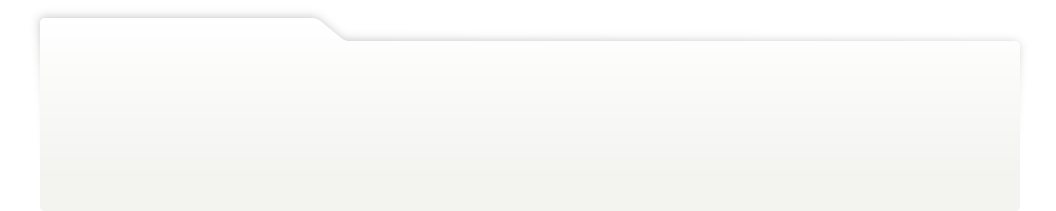
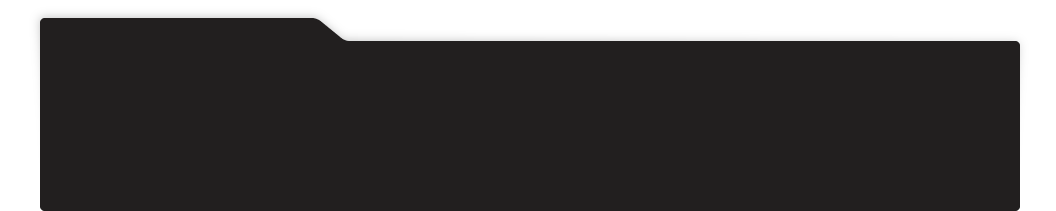
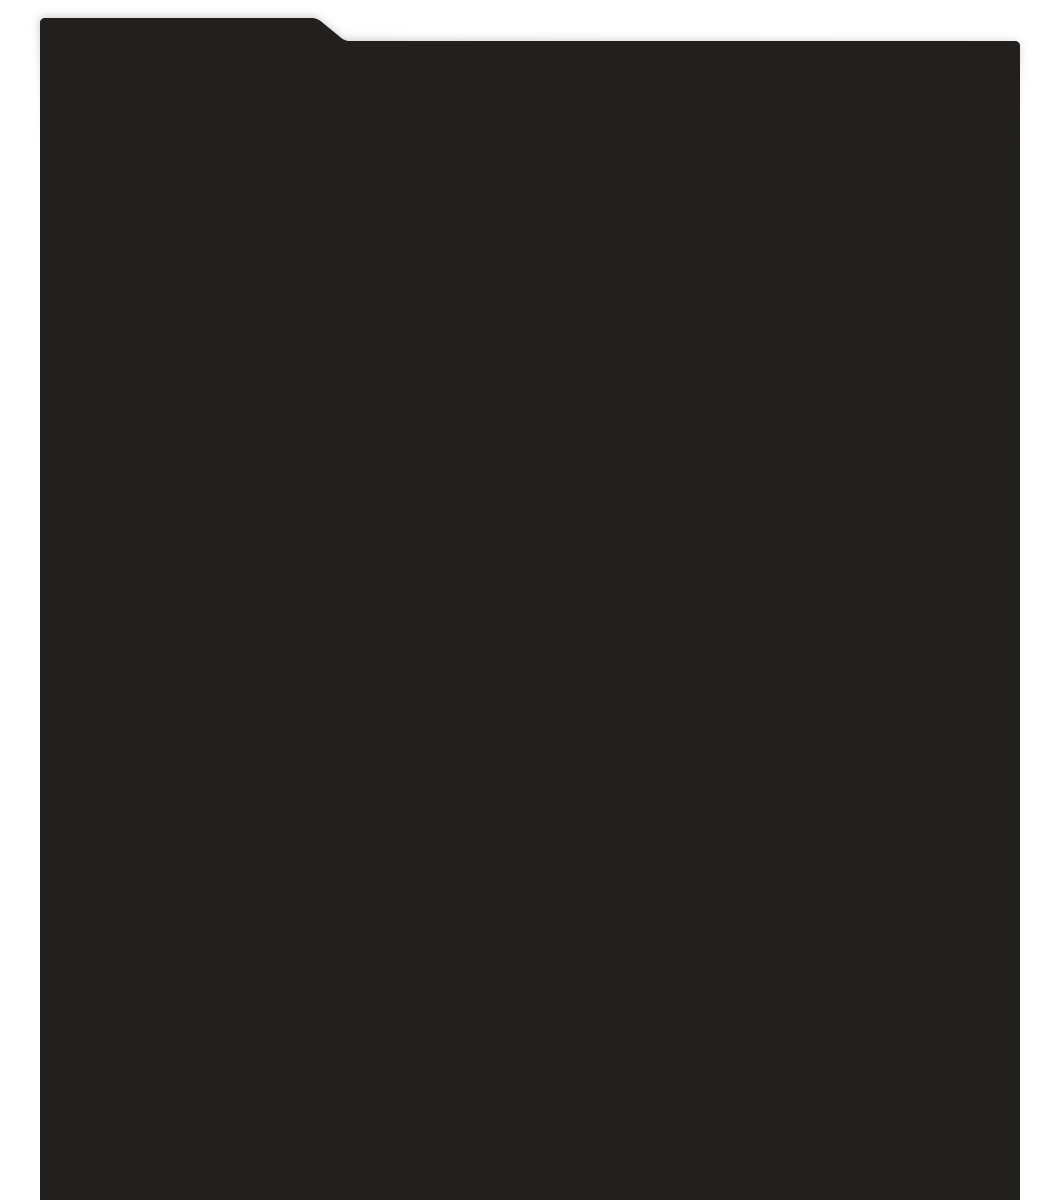
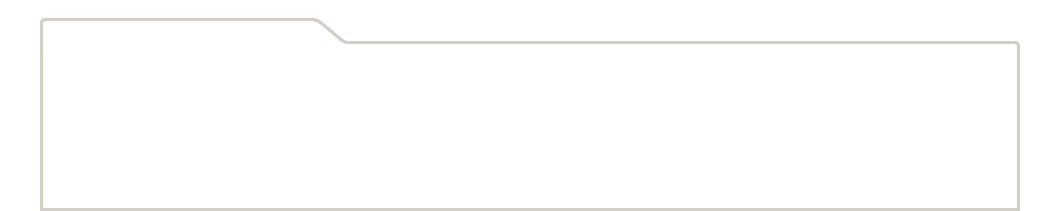
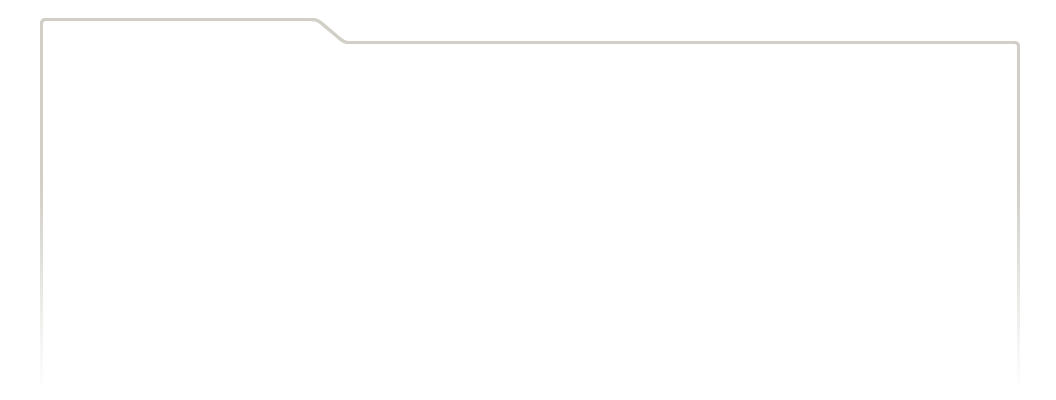
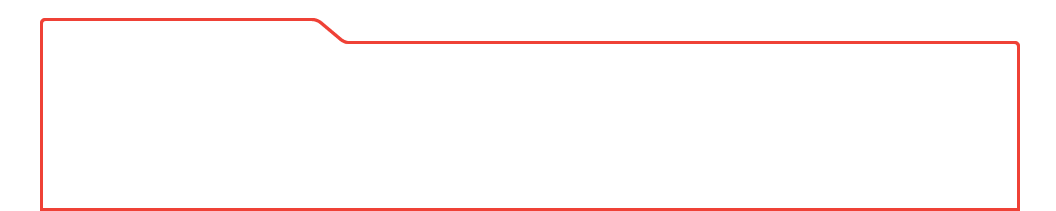
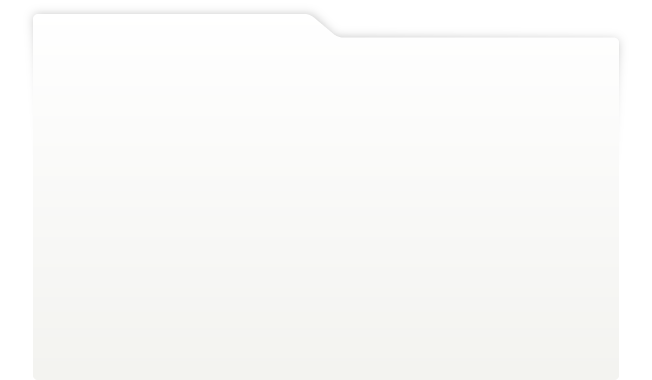
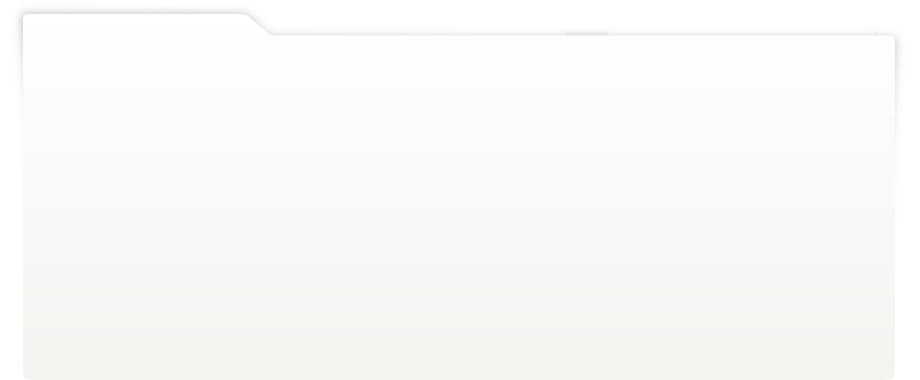
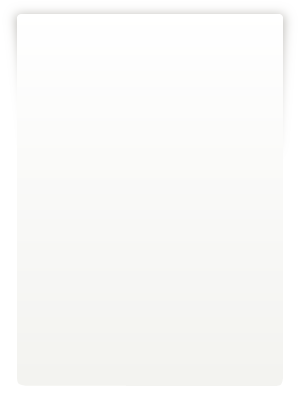
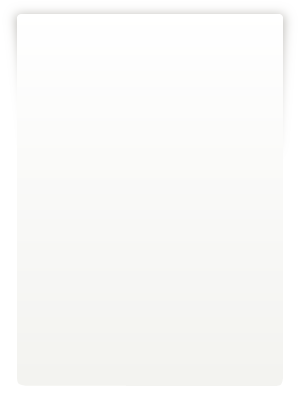
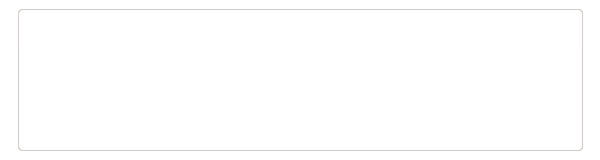
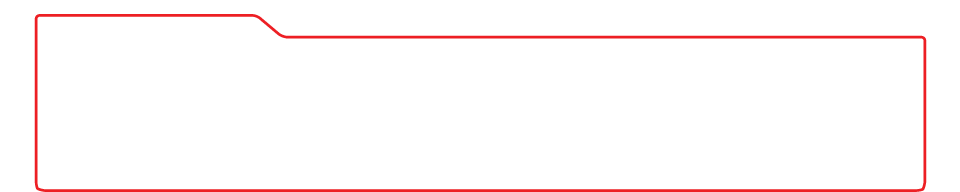
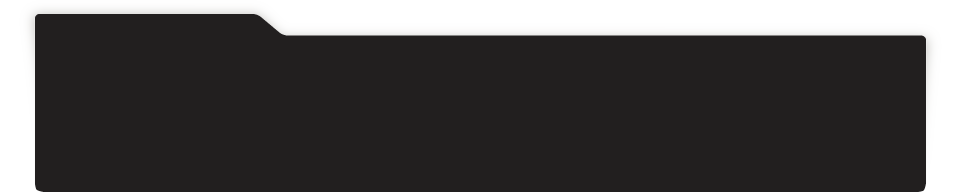
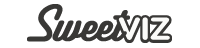
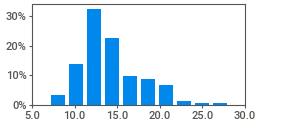
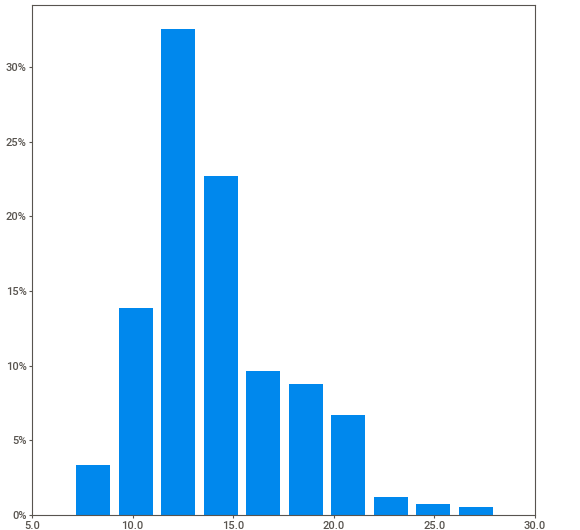
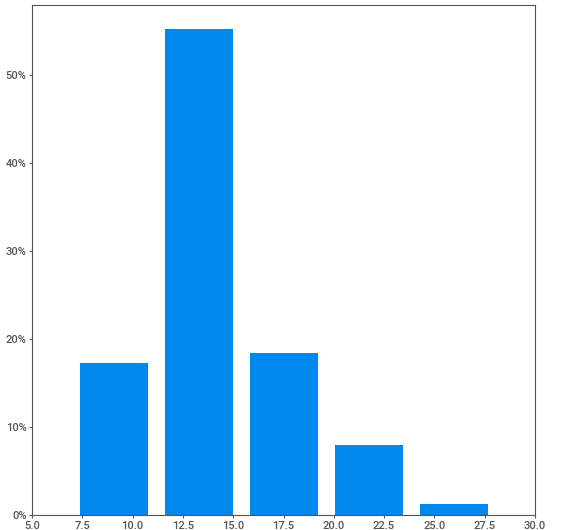
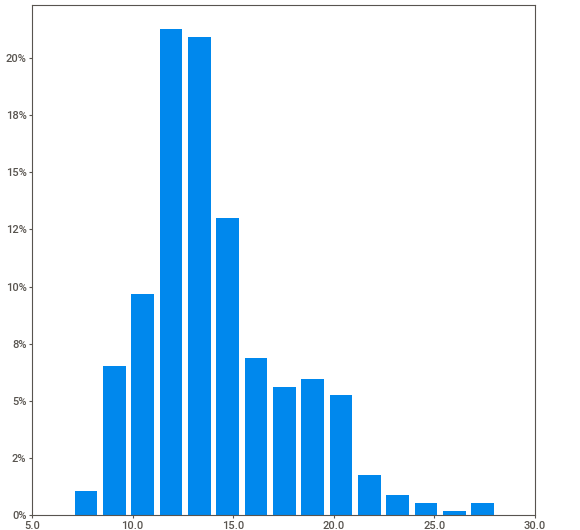
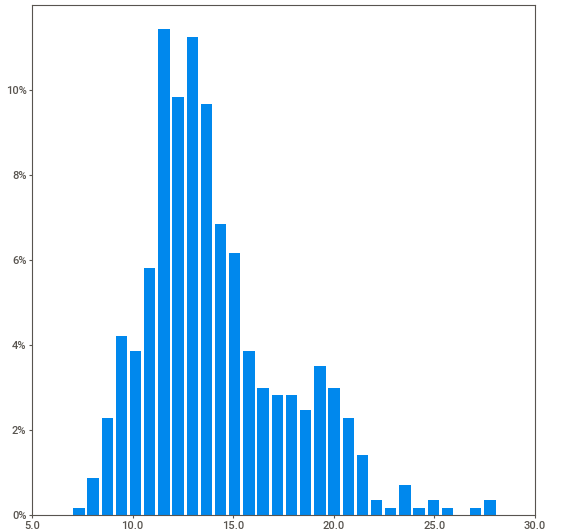
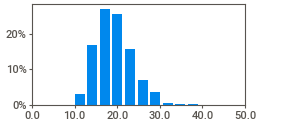
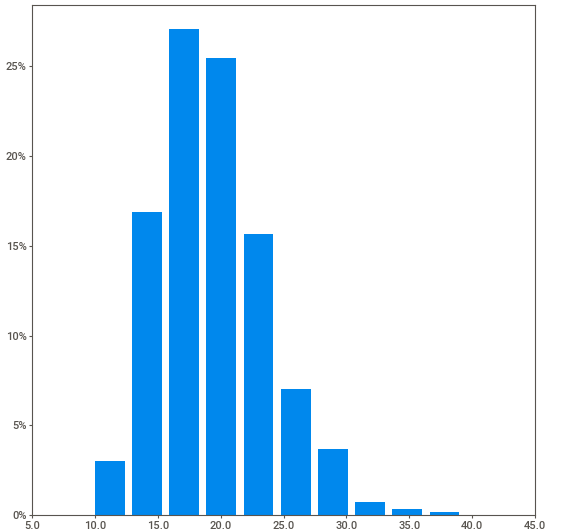
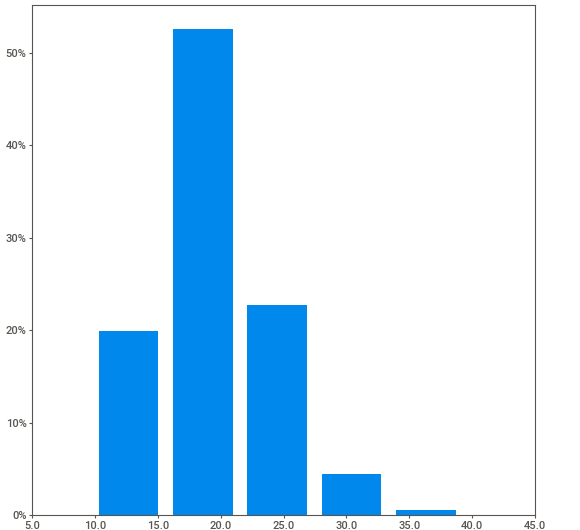
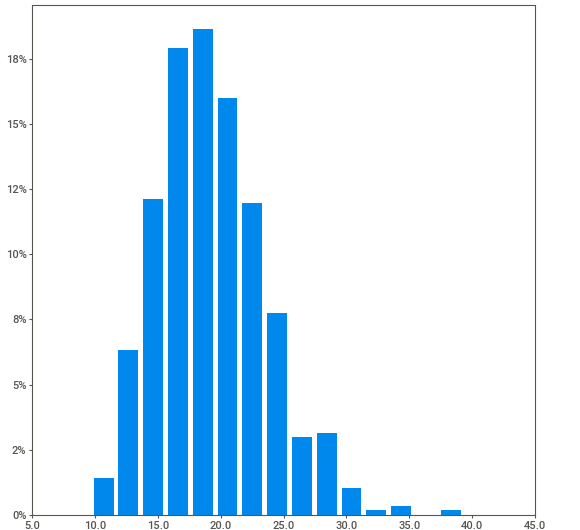
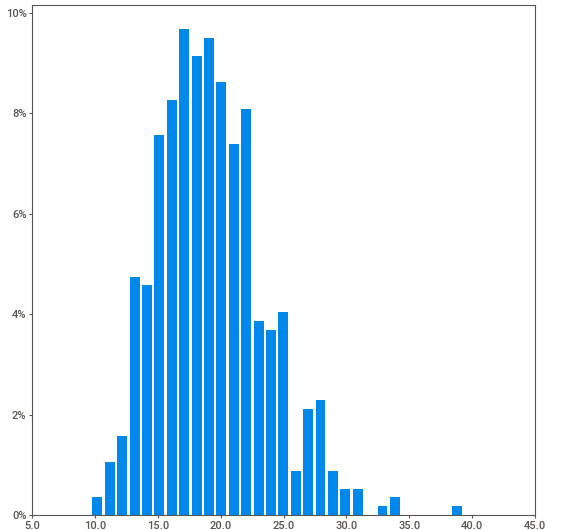
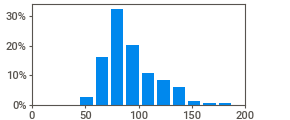
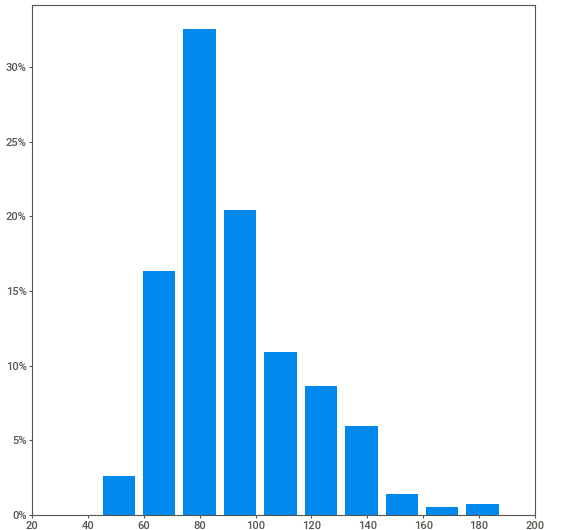
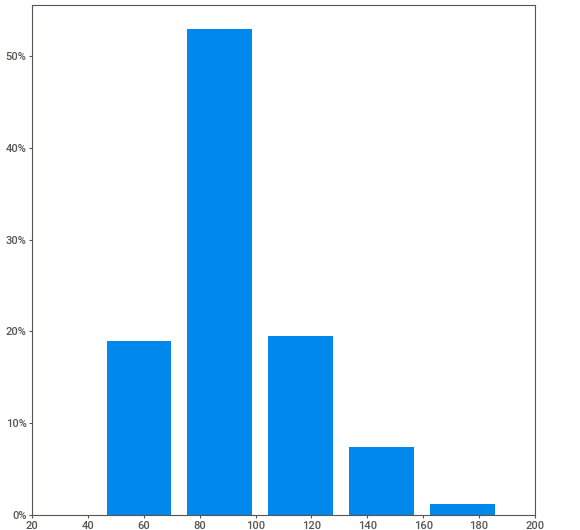
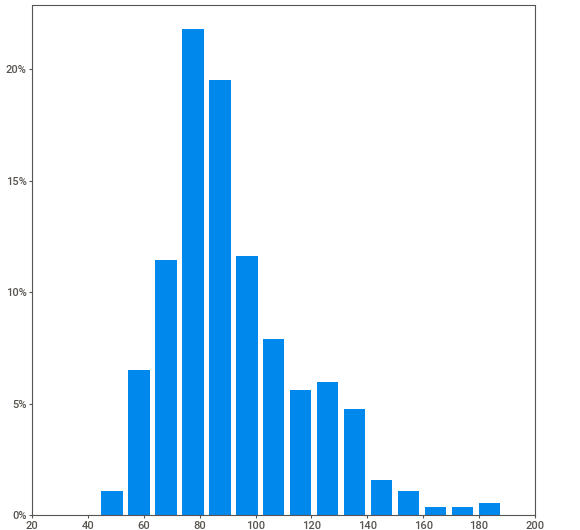
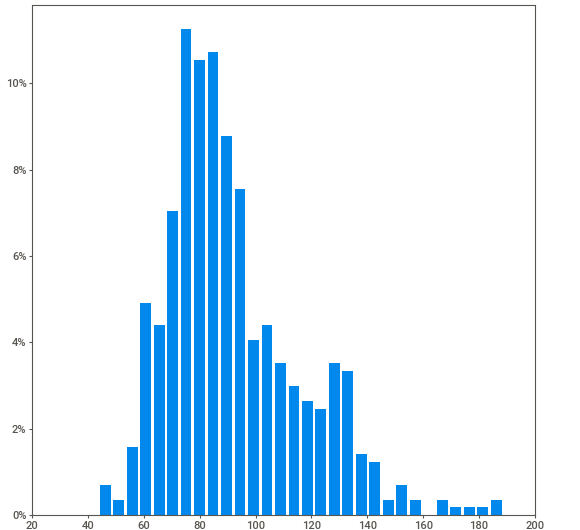
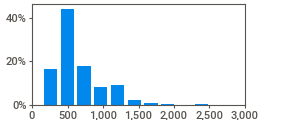
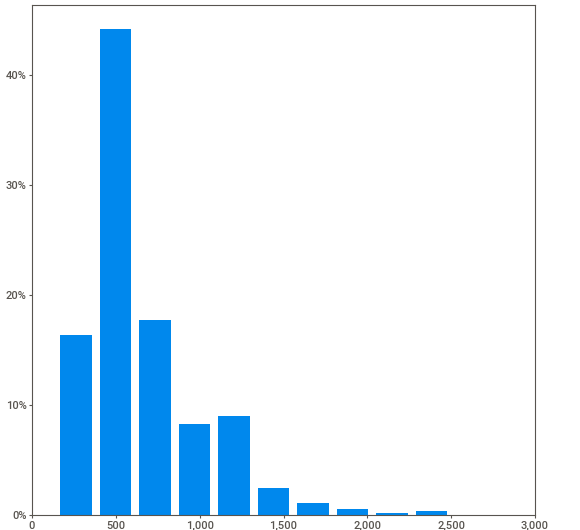
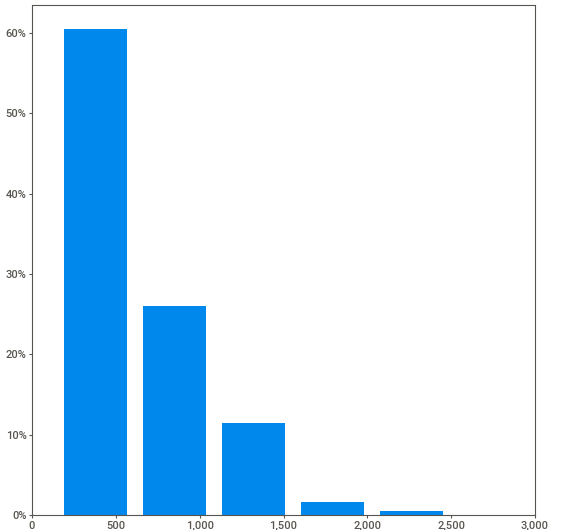
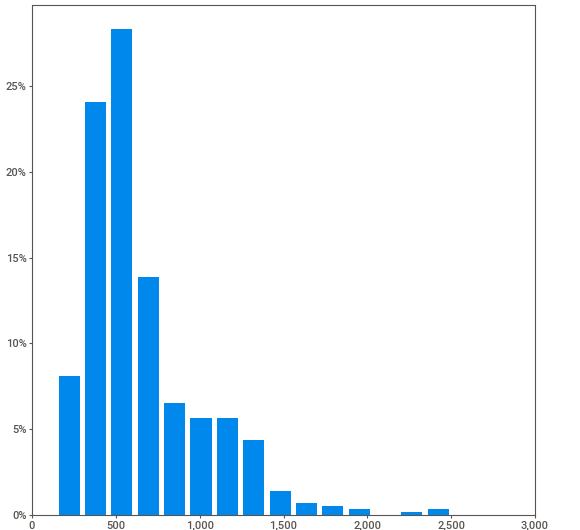
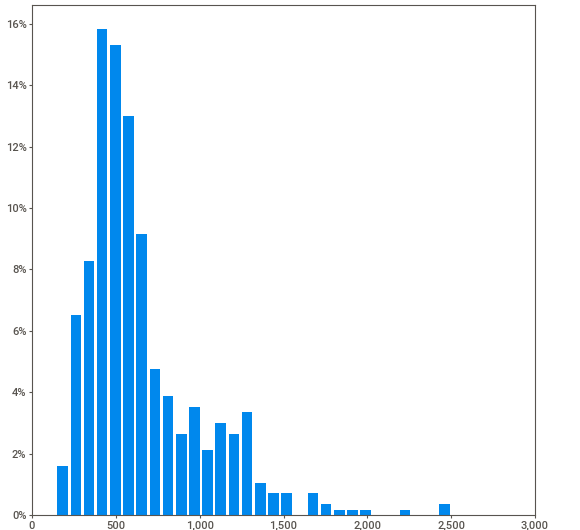
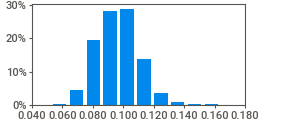
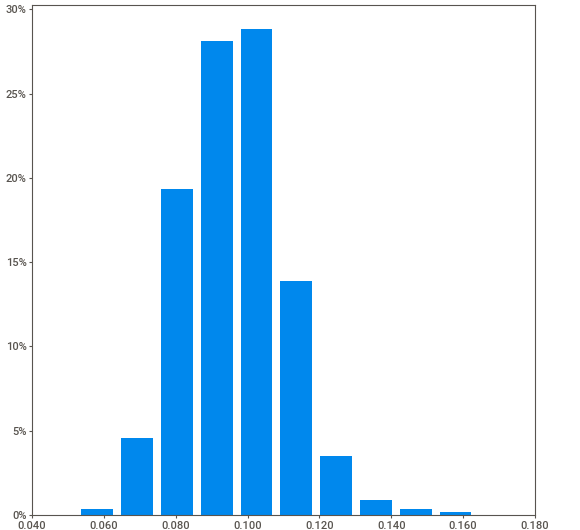
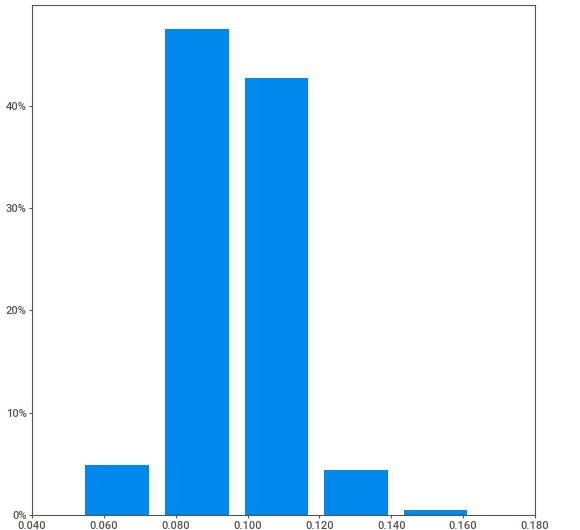
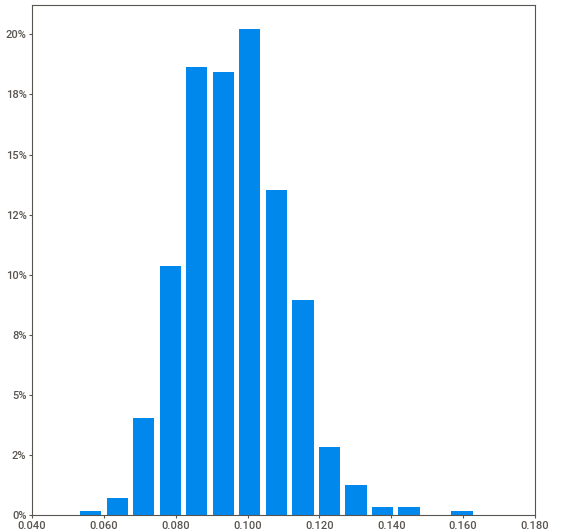
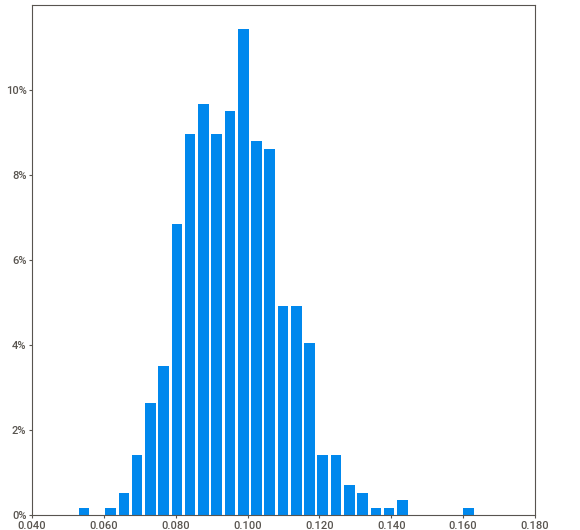
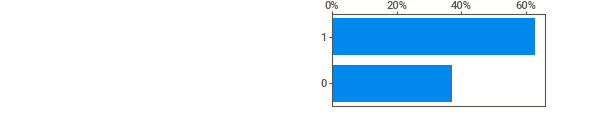
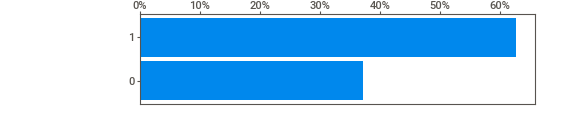
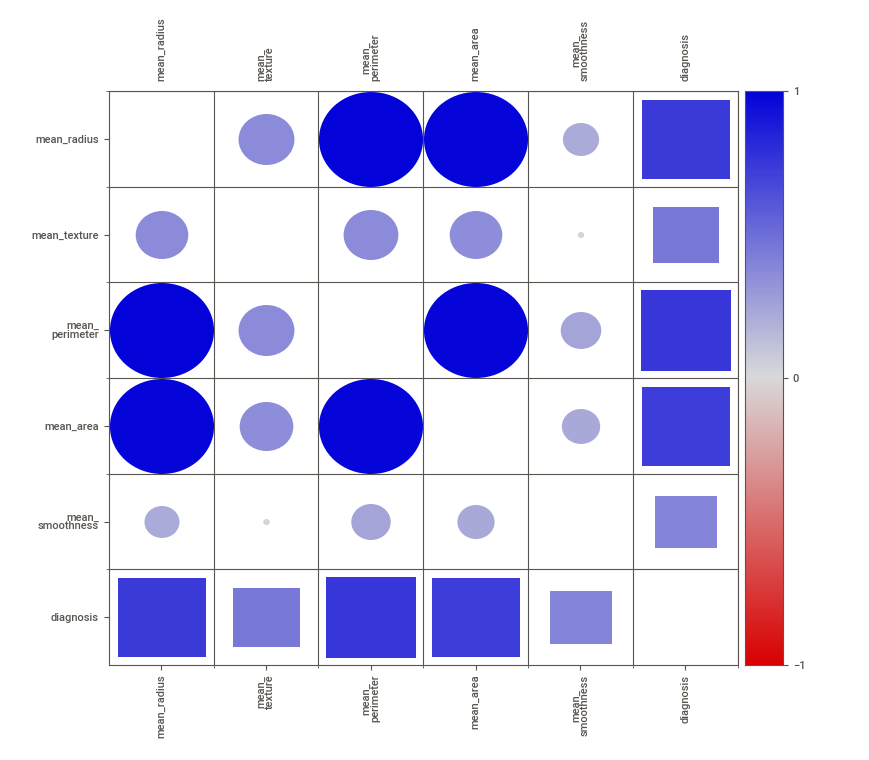
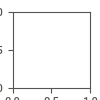

In [18]:
cancer_data_report.show_notebook()

In [42]:
# we will also normalize the distribution and scale the data into 0-1 scale using StandardScaler and MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max_scaler = MinMaxScaler()
new_breast_cancer_data = pd.DataFrame(min_max_scaler.fit_transform(breast_cancer_data), columns=breast_cancer_data.columns)

In [45]:
X = new_breast_cancer_data.iloc[:,:-1]
target = breast_cancer_data["diagnosis"]

In [46]:
standard_scaler = StandardScaler()
X = pd.DataFrame(standard_scaler.fit_transform(X), columns=X.columns)

In [48]:
# total number of rows in the dataset are 569.
# as per given condition we will divide the dataset into desired ratio using imblearn package
# as the data is already in 63-37 ratio so we will not make it imblance for the 65-35% case

In [59]:
imbalanced_75_dataset_X,imbalanced_75_dataset_target  = list(make_imbalance(X,y=target, sampling_strategy={1:267,0:53}))

In [63]:
imbalanced_75_dataset_target.value_counts()

1    267
0     53
Name: diagnosis, dtype: int64

In [58]:
imbalanced_90_dataset_X, imbalanced_90_dataset_target = list(make_imbalance(X,y=target, sampling_strategy={1:321,0:21}))

In [64]:
imbalanced_90_dataset_target.value_counts()

1    321
0     21
Name: diagnosis, dtype: int64